In [20]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [86]:
def conversion_ref(image_filelist, x, y):
    result = []
    data = []
    t = []
    scale_factor = [1.254, 1, 0.645, 1.514]
    rad = 3.42 * pow(10,-3)
    for i, image_file in enumerate(image_filelist):
        hdu = fits.open(image_file)[0]
        header = hdu.header
        data.append(hdu.data)
        t.append(header["TEXP"])
    base = (data[1][y][x] / t[1]) * rad
    for i in range(4):
        z = data[i]
        result.append(((data[i][y][x] / t[i]) / base) * rad * scale_factor[i] )
        # result.append(((data[i][y][x] / t[i]) / base)  )
        print(z[y][x])
    print(t)
    return result
        

['../output_perspective/_2489428266_b_reg_.fits', '../output_perspective/_2489432123_v_reg_.fits', '../output_perspective/_2489436012_w_reg_.fits', '../output_perspective/_2489439885_p_reg_.fits']
2906
2863
3397
3100
[0.131, 0.087, 0.0655, 0.174]
2253
2288
2988
2787
[0.131, 0.087, 0.0655, 0.174]
2645
2570
3292
2750
[0.131, 0.087, 0.0655, 0.174]
[0.8200695096887844, 1.0, 1.1188252015160411, 0.9220974650349653]
[0.8571129295749544, 1.0, 1.0973985208067245, 0.8100194552529183]


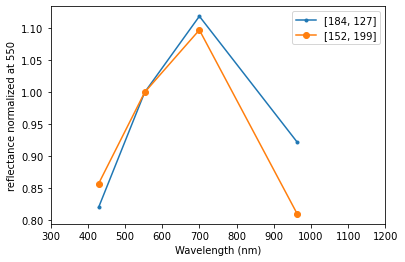

In [94]:
# target_files = "../output_perspective/cor*.fits"
target_files = "../output_perspective/_*.fits"
image_files = sorted(glob.glob(target_files))
print(image_files)
l1 = []
l2 = []
l1 = conversion_ref(image_files, 123, 133)
l1 = conversion_ref(image_files, 135, 145)
l2 = conversion_ref(image_files, 126, 189)
wave_length = [429, 553, 700, 963]
print(l1)
print(l2)
plt.plot(wave_length, l1, marker = ".", label = [184,127])
plt.plot(wave_length, l2, marker = "o", label = [152,199])

plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()

In [34]:
image_files
df_b = pd.DataFrame(fits.getdata(image_files[0]))
df_v = pd.DataFrame(fits.getdata(image_files[1]))
df_w = pd.DataFrame(fits.getdata(image_files[2]))
df_p = pd.DataFrame(fits.getdata(image_files[3]))


[1.2969759, 1.0, 0.7115189, 1.4318722]
[1.2796731, 1.0, 0.72245914, 1.5223881]


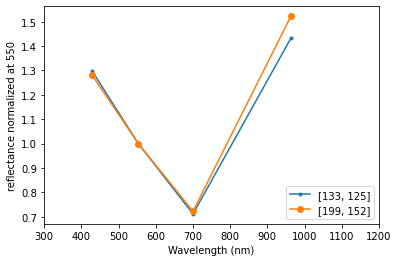

In [40]:
df_b.iloc[133,125]
l1 = [df_b.iloc[133,125] / df_v.iloc[133,125], df_v.iloc[133,125] / df_v.iloc[133,125], df_w.iloc[133,125] / df_v.iloc[133,125], df_p.iloc[133,125] / df_v.iloc[133,125]]
l2 = [df_b.iloc[199,152] / df_v.iloc[199,152], df_v.iloc[199,152] / df_v.iloc[199,152], df_w.iloc[199,152] / df_v.iloc[199,152], df_p.iloc[199,152] / df_v.iloc[199,152]]
plt.plot(wave_length, l1, marker = ".", label = [133,125])
plt.plot(wave_length, l2, marker = "o", label = [199,152])

plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'lower right') 
plt.show()